In [5]:
import spikeinterface.core as sc
import spikeinterface.extractors as se
import spikeinterface.qualitymetrics as sqm
import spikeinterface.widgets as sw
import spikeinterface.exporters as sexp
from probeinterface import ProbeGroup, write_prb
from probeinterface.plotting import plot_probe


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
import glob

%matplotlib inline

#######################################################################
animal_ID = 'FNT098'
session_ID = '2024-03-11T11-24-46'

base_folder = r"Z:\projects\FlexiVexi\behavioural_data"
session_folder = os.path.join(base_folder, animal_ID, session_ID)

#######################################################################

c:\Users\Lab7\anaconda3\envs\spikeinterface-gui\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Load Raw Recording**

In [6]:
# Get path to Open-Ephys Record Node within session folder
matching_files = glob.glob(os.path.join(session_folder, '**', 'settings.xml'), recursive=True)
if matching_files:
    # Get the first matching file
    first_matching_file = matching_files[0]
  
    # Get the directory of the first matching file
    path_to_recording = os.path.dirname(first_matching_file)
else:
    print("No 'settings.xml' file found in the specified path.")
    
# Get recording from open ephys
recording = se.read_openephys(folder_path=path_to_recording, stream_name = 'Record Node 102#Neuropix-PXI-100.ProbeA')

**Export probe as .prb file**

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_contact_ids', '_contact_plane_axes', '_contact_positions', '_contact_shape_params', '_contact_shapes', '_dump_attr_names', '_probe_group', '_shank_ids', 'add_probe_to_zarr_group', 'annotate', 'annotate_contacts', 'annotations', 'check_annotations', 'contact_annotations', 'contact_ids', 'contact_plane_axes', 'contact_positions', 'contact_shape_params', 'contact_shapes', 'copy', 'create_auto_shape', 'device_channel_indices', 'from_dataframe', 'from_dict', 'from_numpy', 'from_zarr', 'from_zarr_group', 'get_contact_count', 'get_contact_vertices', 'get_shank_count', 'get_shanks', 'get_slice', 'get_title', 'manufacturer', 'model_name',

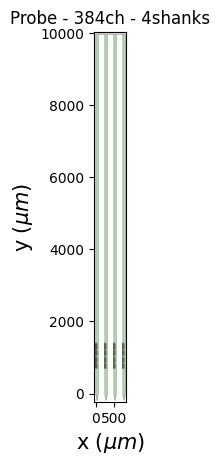

In [14]:
probe = recording.get_probe()
pg = ProbeGroup()
pg.add_probe(probe)

# Write probe file
write_prb(os.path.join(session_folder, 'probe.prb'), pg)

plot_probe(probe)

print(dir(probe))

**Run Kilosort**

In [13]:
from kilosort import run_kilosort

# NOTE: 'n_chan_bin' is a required setting, and should reflect the total number
#       of channels in the binary file. For information on other available
#       settings, see `kilosort.run_kilosort.default_settings`.
settings = {'data_dir': SAVE_PATH.parent, 'n_chan_bin': 385}

ops, st, clu, tF, Wall, similar_templates, is_ref, est_contam_rate = \
    run_kilosort(settings=settings, probe_name='neuropixPhase3B1_kilosortChanMap.mat')

ModuleNotFoundError: No module named 'kilosort'